In [3]:
#Importamos librerias:

from bootcampviztools import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
#Importamos base de datos del Titanic en un DataFrame:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


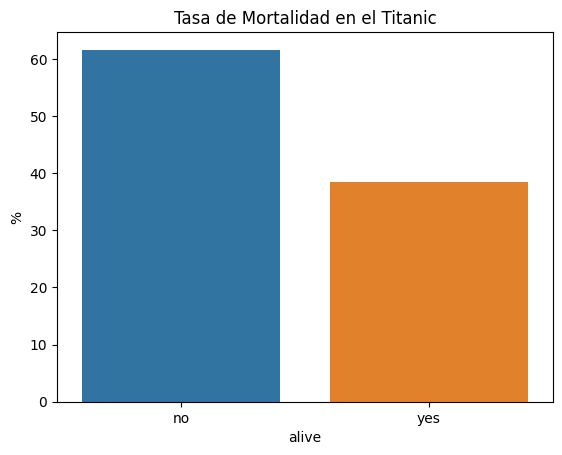

In [11]:
#Pintamos la gráfica con la tasa de mortalidad. Se busca la frecuencia relativa para presentar la tasa en porcentaje:

fig, ax = plt.figure(), plt.axes()
valores = df_titanic.alive.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = ax)
ax.set_title("Tasa de Mortalidad en el Titanic")
ax.set_ylabel("%");

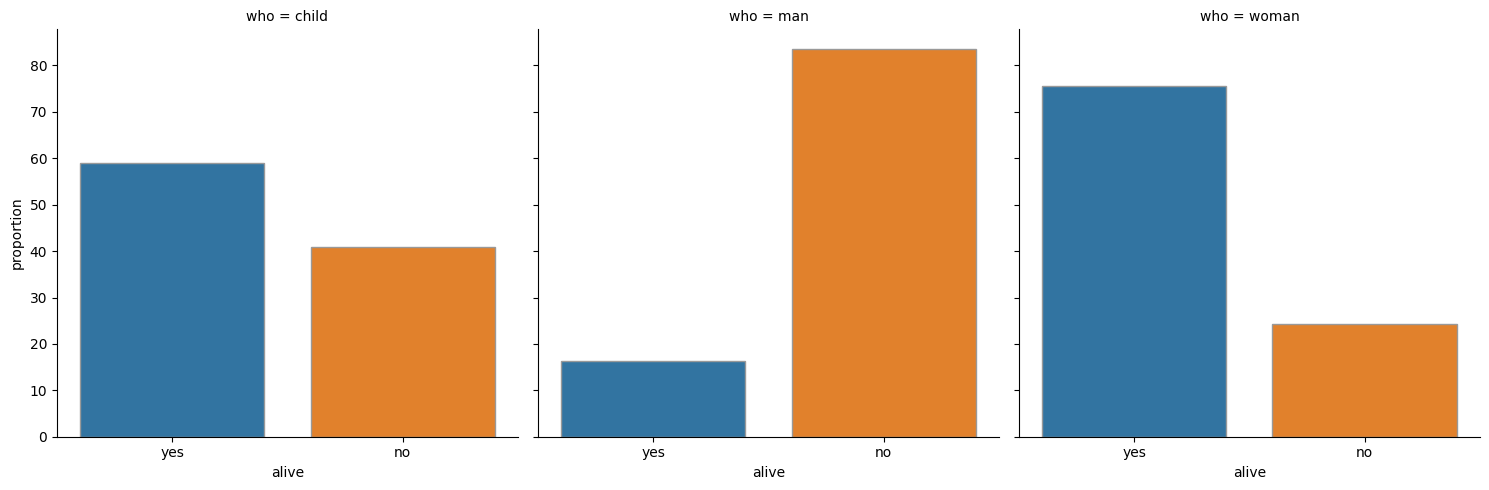

In [14]:
#Comparamos variables alive y who para ver la relación de supervivencia entre mujeres y niños:
cat_colx = "alive"
cat_coly = "who"
frec_rels = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True) #Calcula la frecuencia relativa
frec_rels["proportion"] *= 100 #Vemos la proporción

#Muestra la grafica comparando dos variables:
sns.catplot(x="alive",
            y = "proportion",
            col="who",
            hue = "alive",
            kind="bar", 
            edgecolor=".6",
            data=frec_rels);
